In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Time Series

## Concept and Definitions
<dt><strong>Time series</strong></dt>
<dd> A time series is a set of observation $U=\{x_t\}$, each one being recorded at a specific time $t$.</dd>

It is described by its joint distribution function $p(U)$. An important feature introduced by the concept of time is that the conditional probability of any subset $A_{\tau}\subset\{x_t\}$ (with $\tau$ denoting the time of the latest observation in $A$) on its complement set $\bar{A}_{\tau}$ only depends on those elements in $\bar{A}$ before time $\tau$:
\begin{align}
p(A_{\tau}|\bar{A}_{\tau})=p(A_{\tau}|\{x_{t}:x_{t}\in\bar{A}_{\tau}, t<\tau\}). 
\end{align}

<dt><strong>Mean, Covariance, Correlation</strong></dt>
<dd>Assuming that a time series is generated by a stochastic process $U=\{X_t\}$ with discrete time indices $t\in Z^{0+}$, we can define the mean function as:
$$\mu_{X}(t)=E(X_t),$$
and the covariance function as:
$$\gamma_{X}(r,s)=E((X_r-E(X_r))(X_s-E(X_s))),$$
the correlation function as:
$$\rho_{X}(r,s)=\frac{E[(X_r-E(X_r))(X_s-E(X_s)]}{\sqrt{\gamma_{X}(r,r)}\sqrt{\gamma_{X}(s,s)}}.$$</dd>

    
$\{X_t\}$ is weakly stationary if $\mu_{X}(t)$ is independent of time and $\rho_{X}(r,s)$ only depends on the difference between $r$ and $s$.

If $\{X_t\}$ are iid random variables  with zero mean and finite standard deviation, it is also called iid noise.

White noise is a weaker requirment compared to iid noise with the condition of independence replaced by uncorrelation.

## Classical method

### Moving Average (MR)
$\{X_t\}$ is a moving-average process of order $q$ if 
$$X_t=Z_t+\theta_1Z_{t-1}+...+\theta_{q}Z_{t-q},$$
where $\{Z_t\}\sim WN(0,\sigma^2)$ and $\theta_1,...,\theta_{q}$ are constants.
The moving-average process is stationary since $\theta$ is constant and $\{Z_t\}$ is white noise.

If $q=0$, the process is just white noise. With $q$ larger than 0, there is correlation introduced between $X_t$ because two observations closer than $q$ shares a common white noise component.

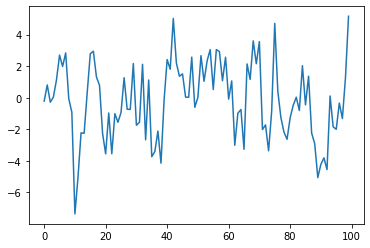

In [32]:
class MR():
    def __init__(self,q):
        self.order=q
        self.theta=np.random.randn(q)
    def predict(self,N):
        # sample N iid normal distribution
        self.N=N
        # generate N+q white noises the first q noises are to generate 
        # the first observation
        Z=np.random.randn(N+self.order)
        self.X=[]
        for i in range(N):
            X_i=np.dot(self.theta,Z[i:self.order+i])+Z[self.order+i]
            self.X.append(X_i)
    def plot(self):
        plt.plot(self.X)
test=MR(3)
test.predict(100)
test.plot()

### Autoregression (AR)
An AR(p) process is a stionary solution $\{X_t\}$ of the equations
$$X_t=\varphi_1X_{t-1}+...+\varphi_pX_{t-p}+Z_t,$$
where $\{Z_t\}\sim WN(0,\sigma^2)$ and $\varphi_1,...,\varphi_{q}$ are constants.

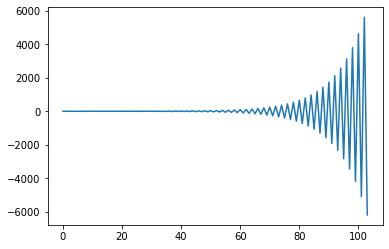

In [30]:
class AR():
    def __init__(self,p):
        self.order=p
        self.varphi=np.random.randn(p)
    def predict(self,N):
        # sample N iid normal distribution
        self.N=N
        Z=np.random.randn(N)
        # inital p observation
        self.X=list(np.random.randn(self.order))
        for i in range(N):
            X_i=np.dot(self.varphi,self.X[i:self.order+i])+Z[i]
            self.X.append(X_i)
    def plot(self):
        plt.plot(self.X)
test=AR(4)
test.predict(100)
test.plot()

We can see a oscillation with increasing amplitude. The oscillation may due to negative value of $\varphi$, thus the process jumps from positive to negative back and forth. The amplitude chage may be explained by looking at the relatio between two time points with distance 2. There maybe a increasing relation between them. 

### ARMR Process
An ARMR(p,q) process is a stionary solution $\{X_t\}$ of the equations
$$X_t-\varphi_{i}X_{t-i}=Z_t+\theta_{j}Z_{t-j},$$
where $i$ runs from 1 to $p$ and $j$ runs from 1 to $q$. It can be seen that an ARMR process combines both AR and MR processes, where the linear dependence on previous observation comes from AR and the linear dependence on previous white noise comes from MR.

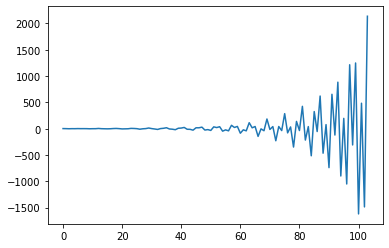

In [31]:
class ARMR():
    def __init__(self,p,q):
        self.p=p
        self.q=q
        self.varphi=np.random.randn(p)
        self.theta=np.random.randn(q)
    def predict(self,N):
        # sample N iid normal distribution
        self.N=N
        Z=np.random.randn(N+self.q)
        # inital p observation
        self.X=list(np.random.randn(self.p))
        for i in range(N):
            X_i=np.dot(self.varphi,self.X[i:self.p+i])\
                +np.dot(self.theta,Z[i:self.q+i])\
                +Z[self.q+i]
            self.X.append(X_i)
    def plot(self):
        plt.plot(self.X)
test=ARMR(4,3)
test.predict(100)
test.plot()

#### Comment
From the plot of the three processes, we can see that MR process has more randomness as can be expected it is composed of white noisce. The AR process has less randomness due to the simple linear dependence on the previous observables. The ARMR process has both properties depending the value of $p$ and $q$, we can choose to introduce more randomness or less.

Using the backward shift operator $B$, which is defined as $BX_{t}=X_{t-1}$, the ARMR process can also be written as:
$$(1-\varphi_{i}B^{i})X_{t}=(1+\theta_{j}B^{j})Z_{t},$$where $B^j$ denotes the $j$th power of $B$. The above expression is very similar to the time evolutio operator in Schrodinger equation.

### ARIMR Process
An ARIMR(p,d,q) process is a stionary solution $\{X_t\}$ of the equations
$$(1-\varphi_{i}B^{i})(1-B)^{d}X_{t}=(1+\theta_{j}B^{j})Z_{t},$$
where $i$ runs from 1 to $p$ and $j$ runs from 1 to $q$. $d$ denotes the number of difference between to adjacent time slices.In terms of the language of physics, $(1-B)X_{t}$ gives the velocity and $(1-B)^{2}X_{t}$ gives the acceleration.So ARIMR process just propose that the $d$th order time derivative of the process is a ARMR process.

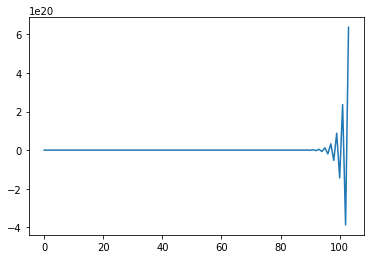

In [42]:
class ARIMR():
    def __init__(self,p,d,q):
        self.p=p
        self.q=q
        self.d=d
        self.varphi=np.random.randn(p)
        self.theta=np.random.randn(q)
    def predict(self,N):
        # sample N iid normal distribution
        self.N=N
        Z=np.random.randn(N+self.q)
        # inital p observation
        self.X=list(np.random.randn(self.p))
        for i in range(N):
            X_i=np.dot(self.varphi,self.X[i:self.p+i])\
                +np.dot(self.theta,Z[i:self.q+i])\
                +Z[self.q+i]
            self.X.append(X_i)
        
        # integrate self.X d times
        for i in range(self.d):
            initial=np.random.randn(1)
            self.X[0]+=initial
            for i in range(1,len(self.X)):
                self.X[i]+=self.X[i-1]
    def plot(self):
        plt.plot(self.X)
test=ARIMR(4,2,3)
test.predict(100)
test.plot()